In [1]:
# # Converting CSV to json
import csv
import json

l=[]

with open("Breast_cancer.csv",encoding='utf-8') as csvf:
    c=csv.DictReader(csvf)
    for x in c:
        l.append(x)
with open("Breast_cancer.json",'w+',encoding='utf-8') as jsonf:
    jsonf.write(json.dumps(l,indent=4)) # csv file is connverted into json


In [1]:
import pymongo

#Establish Connetion
conn=pymongo.MongoClient("mongodb://127.0.0.1:27017/")

In [2]:
#Connecting to database
cancer_db=conn['Cancer_Database']
print(cancer_db)

Database(MongoClient(host=['127.0.0.1:27017'], document_class=dict, tz_aware=False, connect=True), 'Cancer_Database')


In [4]:
#Checking Database exist or not
if 'Cancer_Database' in conn.list_database_names():
    print("Cancer Database already exist")
else:
    print("Cancer Database does not exist")

Cancer Database already exist


In [3]:
#Creating Collection in database
collect=cancer_db['Breast_Cancer']
print(collect)

Collection(Database(MongoClient(host=['127.0.0.1:27017'], document_class=dict, tz_aware=False, connect=True), 'Cancer_Database'), 'Breast_Cancer')


In [10]:
#Loading json file
import json
with open('Breast_cancer.json','r+') as file:
    f = json.load(file)
print(f)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [7]:
#Inserting json file in Cancer_Database
if isinstance(f,list):
    collect.insert_many(f)
else:
    collect.insert_one(f)

In [4]:
#Checking 'Breast_cancer' collection exit or not
print(cancer_db.list_collection_names())

['Breast_Cancer', 'Cancer_Death', 'Cancer_Patients', 'Lung_Cancer']


In [12]:
#Reading data from Cancer_Database 
cancer_mgd=collect.find({},{'_id':False}) #using '_id :False' we are not reading object id created by mongodb, we are reading only json file data

data=[x for x in cancer_mgd]
data

[{'Age_At_The_Time_Of_Mammography': '62',
  'Radiologists_Assessment': 'Negative',
  'Is_Binary_Indicator_Of_Cancer_Diagnosis': 'FALSE',
  'Comparison_Mammogram_From_Mammography': 'Yes',
  'Patients_BI_RADS_Breast_Density': 'Scattered fibroglandular densities',
  'Family_History_Of_Breast_Cancer': 'No',
  'Current_Use_Of_Hormone_Therapy': 'No',
  'Binary_Indicator': 'Yes',
  'History_Of_Breast_Biopsy': 'No',
  'Is_Film_Or_Digital_Mammogram': 'FALSE',
  'Cancer_Type': 'No cancer diagnosis',
  'Body_Mass_Index': '24.0235443',
  'Patients_Study_ID': '1'},
 {'Age_At_The_Time_Of_Mammography': '65',
  'Radiologists_Assessment': 'Negative',
  'Is_Binary_Indicator_Of_Cancer_Diagnosis': 'FALSE',
  'Comparison_Mammogram_From_Mammography': 'Yes',
  'Patients_BI_RADS_Breast_Density': 'Extremely dense',
  'Family_History_Of_Breast_Cancer': 'No',
  'Current_Use_Of_Hormone_Therapy': 'No',
  'Binary_Indicator': 'Yes',
  'History_Of_Breast_Biopsy': 'No',
  'Is_Film_Or_Digital_Mammogram': 'FALSE',
  'Ca

In [2]:
#Establishing connection with mysql
import mysql
import mysql.connector

db=mysql.connector.connect(host="localhost",user="root",passwd="root")


In [3]:
#Creating Database
curs=db.cursor()
try:
    curs.execute("CREATE DATABASE Cancer_mysql")
except:
    print("Database already exist")

Database already exist


In [4]:
#Check database exist or not
curs.execute("SHOW DATABASES")
curs

In [5]:
databases=[x for x in curs]
databases #'cancer_mysql database existed'

[('cancer_mysql',),
 ('information_schema',),
 ('mysql',),
 ('performance_schema',),
 ('sakila',),
 ('sys',),
 ('world',)]

In [6]:
curs.execute("USE cancer_mysql")

In [15]:
#Inserting mongodb data in mysql
# curs.execute('drop table breast_cancer_mysql')
result=curs.execute("create table if not exists breast_cancer_mysql (Age int,Assessment varchar(40),Binary_Indicator_Of_Cancer varchar(30),Comparison_Mammogram_From_Mammography varchar(30),Breast_Density varchar(40),Family_History varchar(20),Current_Use_Of_Hormone_Therapy varchar(20),Binary_Indicator varchar(10),History_Of_Breast_Biopsy varchar(10),Is_Film_Or_Digital_Mammogram varchar(10),Cancer_Type varchar(30),Body_Mass_Index varchar(25),Patients_Study_ID varchar(10))")

In [7]:
#Checking tables exist or not
curs.execute("SHOW TABLES")
tables=[x for x in curs]
tables #'breast_cancer_mysql table existed'

[('breast_cancer_mysql',),
 ('cancer_death_mysql',),
 ('cancer_patients_mysql',),
 ('lung_cancer_mysql',)]

In [17]:
i=0
for x in data:
    Age= x.get('Age_At_The_Time_Of_Mammography')
    Assessment= x.get('Radiologists_Assessment')
    Binary_Indicator_Of_Cancer= x.get('Is_Binary_Indicator_Of_Cancer_Diagnosis')
    Comparison_Mammogram_From_Mammography= x.get('Comparison_Mammogram_From_Mammography')
    Breast_Density= x.get('Patients_BI_RADS_Breast_Density')
    Family_History= x.get('Family_History_Of_Breast_Cancer')
    Current_Use_Of_Hormone_Therapy= x.get('Current_Use_Of_Hormone_Therapy')
    Binary_Indicator= x.get('Binary_Indicator')
    History_Of_Breast_Biopsy= x.get('History_Of_Breast_Biopsy')
    Is_Film_Or_Digital_Mammogram= x.get('Is_Film_Or_Digital_Mammogram')
    Cancer_Type= x.get('Cancer_Type')
    Body_Mass_Index = x.get('Body_Mass_Index')
    Patients_Study_ID = x.get('Patients_Study_ID')
        
    sql = "INSERT INTO breast_cancer_mysql (Age,Assessment,Binary_Indicator_Of_Cancer,Comparison_Mammogram_From_Mammography,Breast_Density,Family_History,Current_Use_Of_Hormone_Therapy,Binary_Indicator,History_Of_Breast_Biopsy,Is_Film_Or_Digital_Mammogram,Cancer_Type,Body_Mass_Index,Patients_Study_ID) VALUES (%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s)"
    val = (Age,Assessment,Binary_Indicator_Of_Cancer,Comparison_Mammogram_From_Mammography,Breast_Density,Family_History,Current_Use_Of_Hormone_Therapy,Binary_Indicator,History_Of_Breast_Biopsy,Is_Film_Or_Digital_Mammogram,Cancer_Type,Body_Mass_Index,Patients_Study_ID)
    curs.execute(sql, val)
    i+=1
db.commit()

In [19]:
#Reading data from mysql
curs.execute('select * from breast_cancer_mysql')
breast_db=[x for x in curs]
db.close()   #Closing of database connection

In [20]:
#Using dataframe we can do analysis 
import pandas as pd

breast_cancer=pd.DataFrame(breast_db,columns=['Age','Assessment','Binary_Indicator_Of_Cancer','Comparison_Mammogram_From_Mammography','Breast_Density','Family_History','Current_Use_Of_Hormone_Therapy','Binary_Indicator','History_Of_Breast_Biopsy','Is_Film_Or_Digital_Mammogram','Cancer_Type','Body_Mass_Index','Patients_Study_ID'])

In [21]:
breast_cancer.head()

,Age,Assessment,Binary_Indicator_Of_Cancer,Comparison_Mammogram_From_Mammography,Breast_Density,Family_History,Current_Use_Of_Hormone_Therapy,Binary_Indicator,History_Of_Breast_Biopsy,Is_Film_Or_Digital_Mammogram,Cancer_Type,Body_Mass_Index,Patients_Study_ID
0,62,Negative,FALSE,Yes,Scattered fibroglandular densities,No,No,Yes,No,FALSE,No cancer diagnosis,24.0235443,1
1,65,Negative,FALSE,Yes,Extremely dense,No,No,Yes,No,FALSE,No cancer diagnosis,Missing,2
2,69,Needs additional imaging,FALSE,Yes,Scattered fibroglandular densities,No,No,Yes,No,FALSE,No cancer diagnosis,29.0524292,3
3,64,Benign findings,FALSE,Yes,Scattered fibroglandular densities,No,No,Yes,No,FALSE,No cancer diagnosis,Missing,4
4,63,Probably benign,FALSE,Yes,Scattered fibroglandular densities,No,No,Yes,Yes,FALSE,No cancer diagnosis,33.7295227,5


In [22]:
breast_cancer.shape

(10046, 13)

array([[<AxesSubplot:title={'center':'Age'}>]], dtype=object)

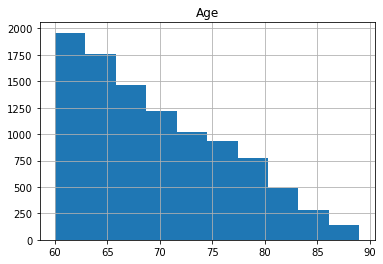

In [57]:
import matplotlib.pyplot as plt
breast_cancer.hist(column='Age')

array([<AxesSubplot:ylabel='Age'>], dtype=object)

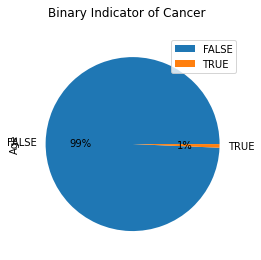

In [24]:
breast_cancer.groupby(['Binary_Indicator_Of_Cancer']).sum().plot(kind='pie',
                                                                 subplots=True, 
                                                                 autopct='%1.0f%%',
                                                                 title='Binary Indicator of Cancer')

array([<AxesSubplot:ylabel='Age'>], dtype=object)

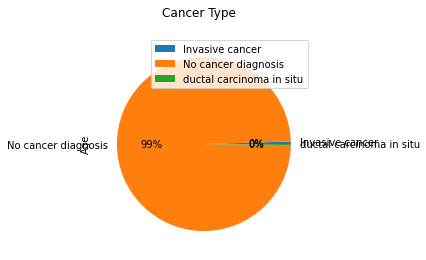

In [25]:
breast_cancer.groupby(['Cancer_Type']).sum().plot(kind='pie',
                                                  subplots=True, 
                                                  autopct='%1.0f%%',
                                                  title='Cancer Type')

<AxesSubplot:>

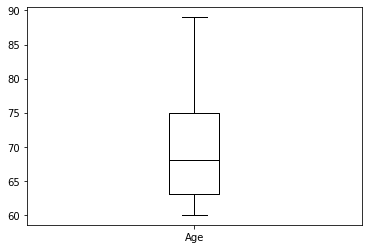

In [26]:
breast_cancer.boxplot(column=['Age'], grid=False, color='black')

In [28]:
breast_cancer[breast_cancer.isnull().any(axis=1)]

,Age,Assessment,Binary_Indicator_Of_Cancer,Comparison_Mammogram_From_Mammography,Breast_Density,Family_History,Current_Use_Of_Hormone_Therapy,Binary_Indicator,History_Of_Breast_Biopsy,Is_Film_Or_Digital_Mammogram,Cancer_Type,Body_Mass_Index,Patients_Study_ID


In [33]:
breast_cancer[['Age','Assessment','Breast_Density','Cancer_Type']].head()

,Age,Assessment,Breast_Density,Cancer_Type
0,62,Negative,Scattered fibroglandular densities,No cancer diagnosis
1,65,Negative,Extremely dense,No cancer diagnosis
2,69,Needs additional imaging,Scattered fibroglandular densities,No cancer diagnosis
3,64,Benign findings,Scattered fibroglandular densities,No cancer diagnosis
4,63,Probably benign,Scattered fibroglandular densities,No cancer diagnosis


<AxesSubplot:>

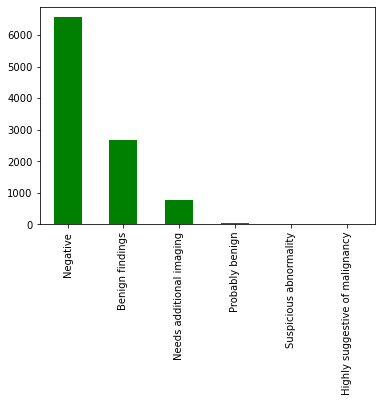

In [40]:
breast_cancer['Assessment'].value_counts().plot(kind='bar',color='green')

<AxesSubplot:>

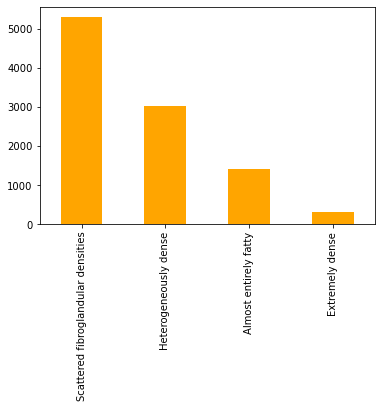

In [42]:
breast_cancer['Breast_Density'].value_counts().plot(kind='bar',color='orange')

In [43]:
breast_cancer.head()

,Age,Assessment,Binary_Indicator_Of_Cancer,Comparison_Mammogram_From_Mammography,Breast_Density,Family_History,Current_Use_Of_Hormone_Therapy,Binary_Indicator,History_Of_Breast_Biopsy,Is_Film_Or_Digital_Mammogram,Cancer_Type,Body_Mass_Index,Patients_Study_ID
0,62,Negative,FALSE,Yes,Scattered fibroglandular densities,No,No,Yes,No,FALSE,No cancer diagnosis,24.0235443,1
1,65,Negative,FALSE,Yes,Extremely dense,No,No,Yes,No,FALSE,No cancer diagnosis,Missing,2
2,69,Needs additional imaging,FALSE,Yes,Scattered fibroglandular densities,No,No,Yes,No,FALSE,No cancer diagnosis,29.0524292,3
3,64,Benign findings,FALSE,Yes,Scattered fibroglandular densities,No,No,Yes,No,FALSE,No cancer diagnosis,Missing,4
4,63,Probably benign,FALSE,Yes,Scattered fibroglandular densities,No,No,Yes,Yes,FALSE,No cancer diagnosis,33.7295227,5


<Figure size 800x640 with 0 Axes>

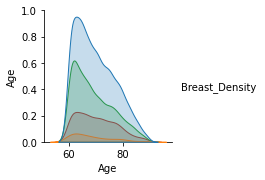

In [62]:
import seaborn as sns
plt.figure(figsize=(10,8), dpi= 80)
sns.pairplot(breast_cancer, kind="scatter", hue="Breast_Density", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.show()